In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [6]:
data = pd.read_csv('/content/Google_test_data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3809 non-null   object 
 1   Open       3809 non-null   float64
 2   High       3809 non-null   float64
 3   Low        3809 non-null   float64
 4   Close      3809 non-null   float64
 5   Adj Close  3809 non-null   float64
 6   Volume     3809 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 208.4+ KB


In [8]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3809 entries, 0 to 3808
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3809 non-null   object 
 1   Open       3809 non-null   float64
 2   High       3809 non-null   float64
 3   Low        3809 non-null   float64
 4   Close      3809 non-null   float64
 5   Adj Close  3809 non-null   float64
 6   Volume     3809 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 208.4+ KB


In [10]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(3809, 1)

In [12]:
X_train = []
y_train = []
for i in range (60,1149): #60 : timestep // 1149 : length of the data
  X_train.append(trainData[i-60:i,0])
  y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [13]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_siz
X_train.shape

(1089, 60, 1)

In [14]:
model = Sequential()
model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [15]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)


Epoch 1/20
35/35 - 30s - loss: 0.0020 - 30s/epoch - 854ms/step
Epoch 2/20
35/35 - 11s - loss: 2.9740e-04 - 11s/epoch - 325ms/step
Epoch 3/20
35/35 - 9s - loss: 3.0696e-04 - 9s/epoch - 251ms/step
Epoch 4/20
35/35 - 6s - loss: 2.4296e-04 - 6s/epoch - 177ms/step
Epoch 5/20
35/35 - 7s - loss: 2.3558e-04 - 7s/epoch - 206ms/step
Epoch 6/20
35/35 - 6s - loss: 2.0654e-04 - 6s/epoch - 178ms/step
Epoch 7/20
35/35 - 7s - loss: 2.1458e-04 - 7s/epoch - 205ms/step
Epoch 8/20
35/35 - 6s - loss: 1.9450e-04 - 6s/epoch - 174ms/step
Epoch 9/20
35/35 - 7s - loss: 1.9618e-04 - 7s/epoch - 205ms/step
Epoch 10/20
35/35 - 7s - loss: 1.7495e-04 - 7s/epoch - 189ms/step
Epoch 11/20
35/35 - 8s - loss: 2.0349e-04 - 8s/epoch - 241ms/step
Epoch 12/20
35/35 - 6s - loss: 3.3194e-04 - 6s/epoch - 175ms/step
Epoch 13/20
35/35 - 7s - loss: 1.9078e-04 - 7s/epoch - 206ms/step
Epoch 14/20
35/35 - 6s - loss: 1.7568e-04 - 6s/epoch - 174ms/step
Epoch 15/20
35/35 - 8s - loss: 2.1152e-04 - 8s/epoch - 222ms/step
Epoch 16/20
35/35 -

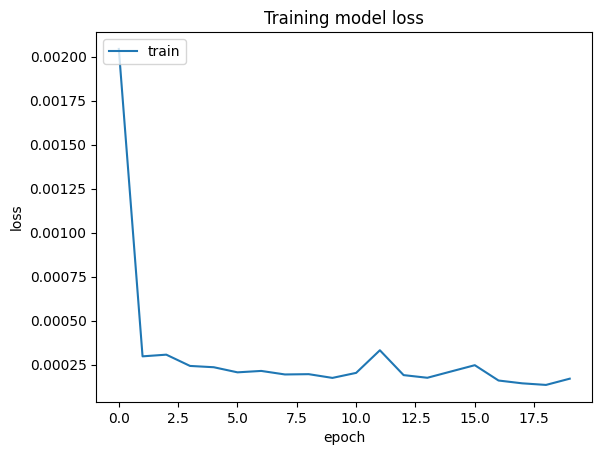

In [16]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


In [17]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
  X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(3749, 60, 1)

In [18]:
y_pred = model.predict(X_test)
y_pred


118/118 [==============================] - 9s 62ms/step


array([[0.03496296],
       [0.0336091 ],
       [0.03243432],
       ...,
       [0.7911199 ],
       [0.7884886 ],
       [0.78475994]], dtype=float32)

In [19]:
predicted_price = sc.inverse_transform(y_pred)

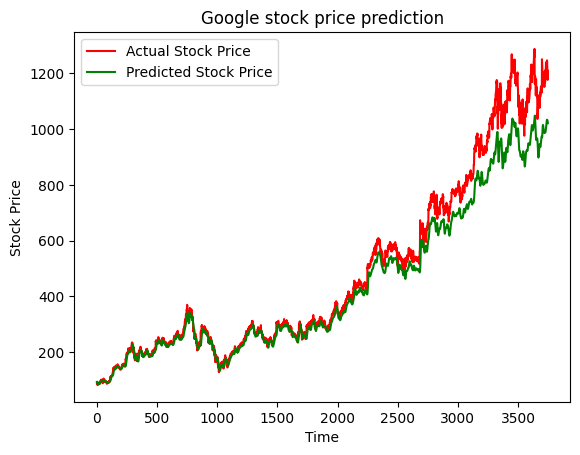

In [20]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()